<a href="https://www.kaggle.com/code/nursenaglhan/laptop-price-prediction-eda?scriptVersionId=205144744" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [2]:
df= pd.read_csv("/kaggle/input/laptop-prices/laptop_prices.csv")

In [3]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


In [4]:
pd.set_option("display.max_columns", None)

In [5]:
df.tail()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,638.0,Full HD,1920,1080,Yes,Yes,No,Intel,2.5,Core i7 6500U,128,0,SSD,No,Intel,HD Graphics 520
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,1499.0,Quad HD+,3200,1800,Yes,Yes,No,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,229.0,Standard,1366,768,No,No,No,Intel,1.6,Celeron Dual Core N3050,64,0,Flash Storage,No,Intel,HD Graphics
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,764.0,Standard,1366,768,No,No,No,Intel,2.5,Core i7 6500U,1024,0,HDD,No,AMD,Radeon R5 M330
1274,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,4,Windows 10,2.20,369.0,Standard,1366,768,No,No,No,Intel,1.6,Celeron Dual Core N3050,500,0,HDD,No,Intel,HD Graphics


In [6]:
df=pd.get_dummies(df,columns=["SecondaryStorageType","GPU_company","PrimaryStorageType","CPU_company","Screen","OS"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company                           1275 non-null   object 
 1   Product                           1275 non-null   object 
 2   TypeName                          1275 non-null   object 
 3   Inches                            1275 non-null   float64
 4   Ram                               1275 non-null   int64  
 5   Weight                            1275 non-null   float64
 6   Price_euros                       1275 non-null   float64
 7   ScreenW                           1275 non-null   int64  
 8   ScreenH                           1275 non-null   int64  
 9   Touchscreen                       1275 non-null   object 
 10  IPSpanel                          1275 non-null   object 
 11  RetinaDisplay                     1275 non-null   object 
 12  CPU_fr

In [8]:
#df["TypeName"].value_counts()

In [9]:
le=LabelEncoder()
df["CPU_model"]=le.fit_transform(df["CPU_model"])
df["GPU_model"]=le.fit_transform(df["GPU_model"])
df["RetinaDisplay"]=le.fit_transform(df["RetinaDisplay"])
df["Touchscreen"]=le.fit_transform(df["Touchscreen"])
df["IPSpanel"]=le.fit_transform(df["IPSpanel"])
df["Company"]=le.fit_transform(df["Company"])
df["Product"]=le.fit_transform(df["Product"])
df["TypeName"]=le.fit_transform(df["TypeName"])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company                           1275 non-null   int64  
 1   Product                           1275 non-null   int64  
 2   TypeName                          1275 non-null   int64  
 3   Inches                            1275 non-null   float64
 4   Ram                               1275 non-null   int64  
 5   Weight                            1275 non-null   float64
 6   Price_euros                       1275 non-null   float64
 7   ScreenW                           1275 non-null   int64  
 8   ScreenH                           1275 non-null   int64  
 9   Touchscreen                       1275 non-null   int64  
 10  IPSpanel                          1275 non-null   int64  
 11  RetinaDisplay                     1275 non-null   int64  
 12  CPU_fr

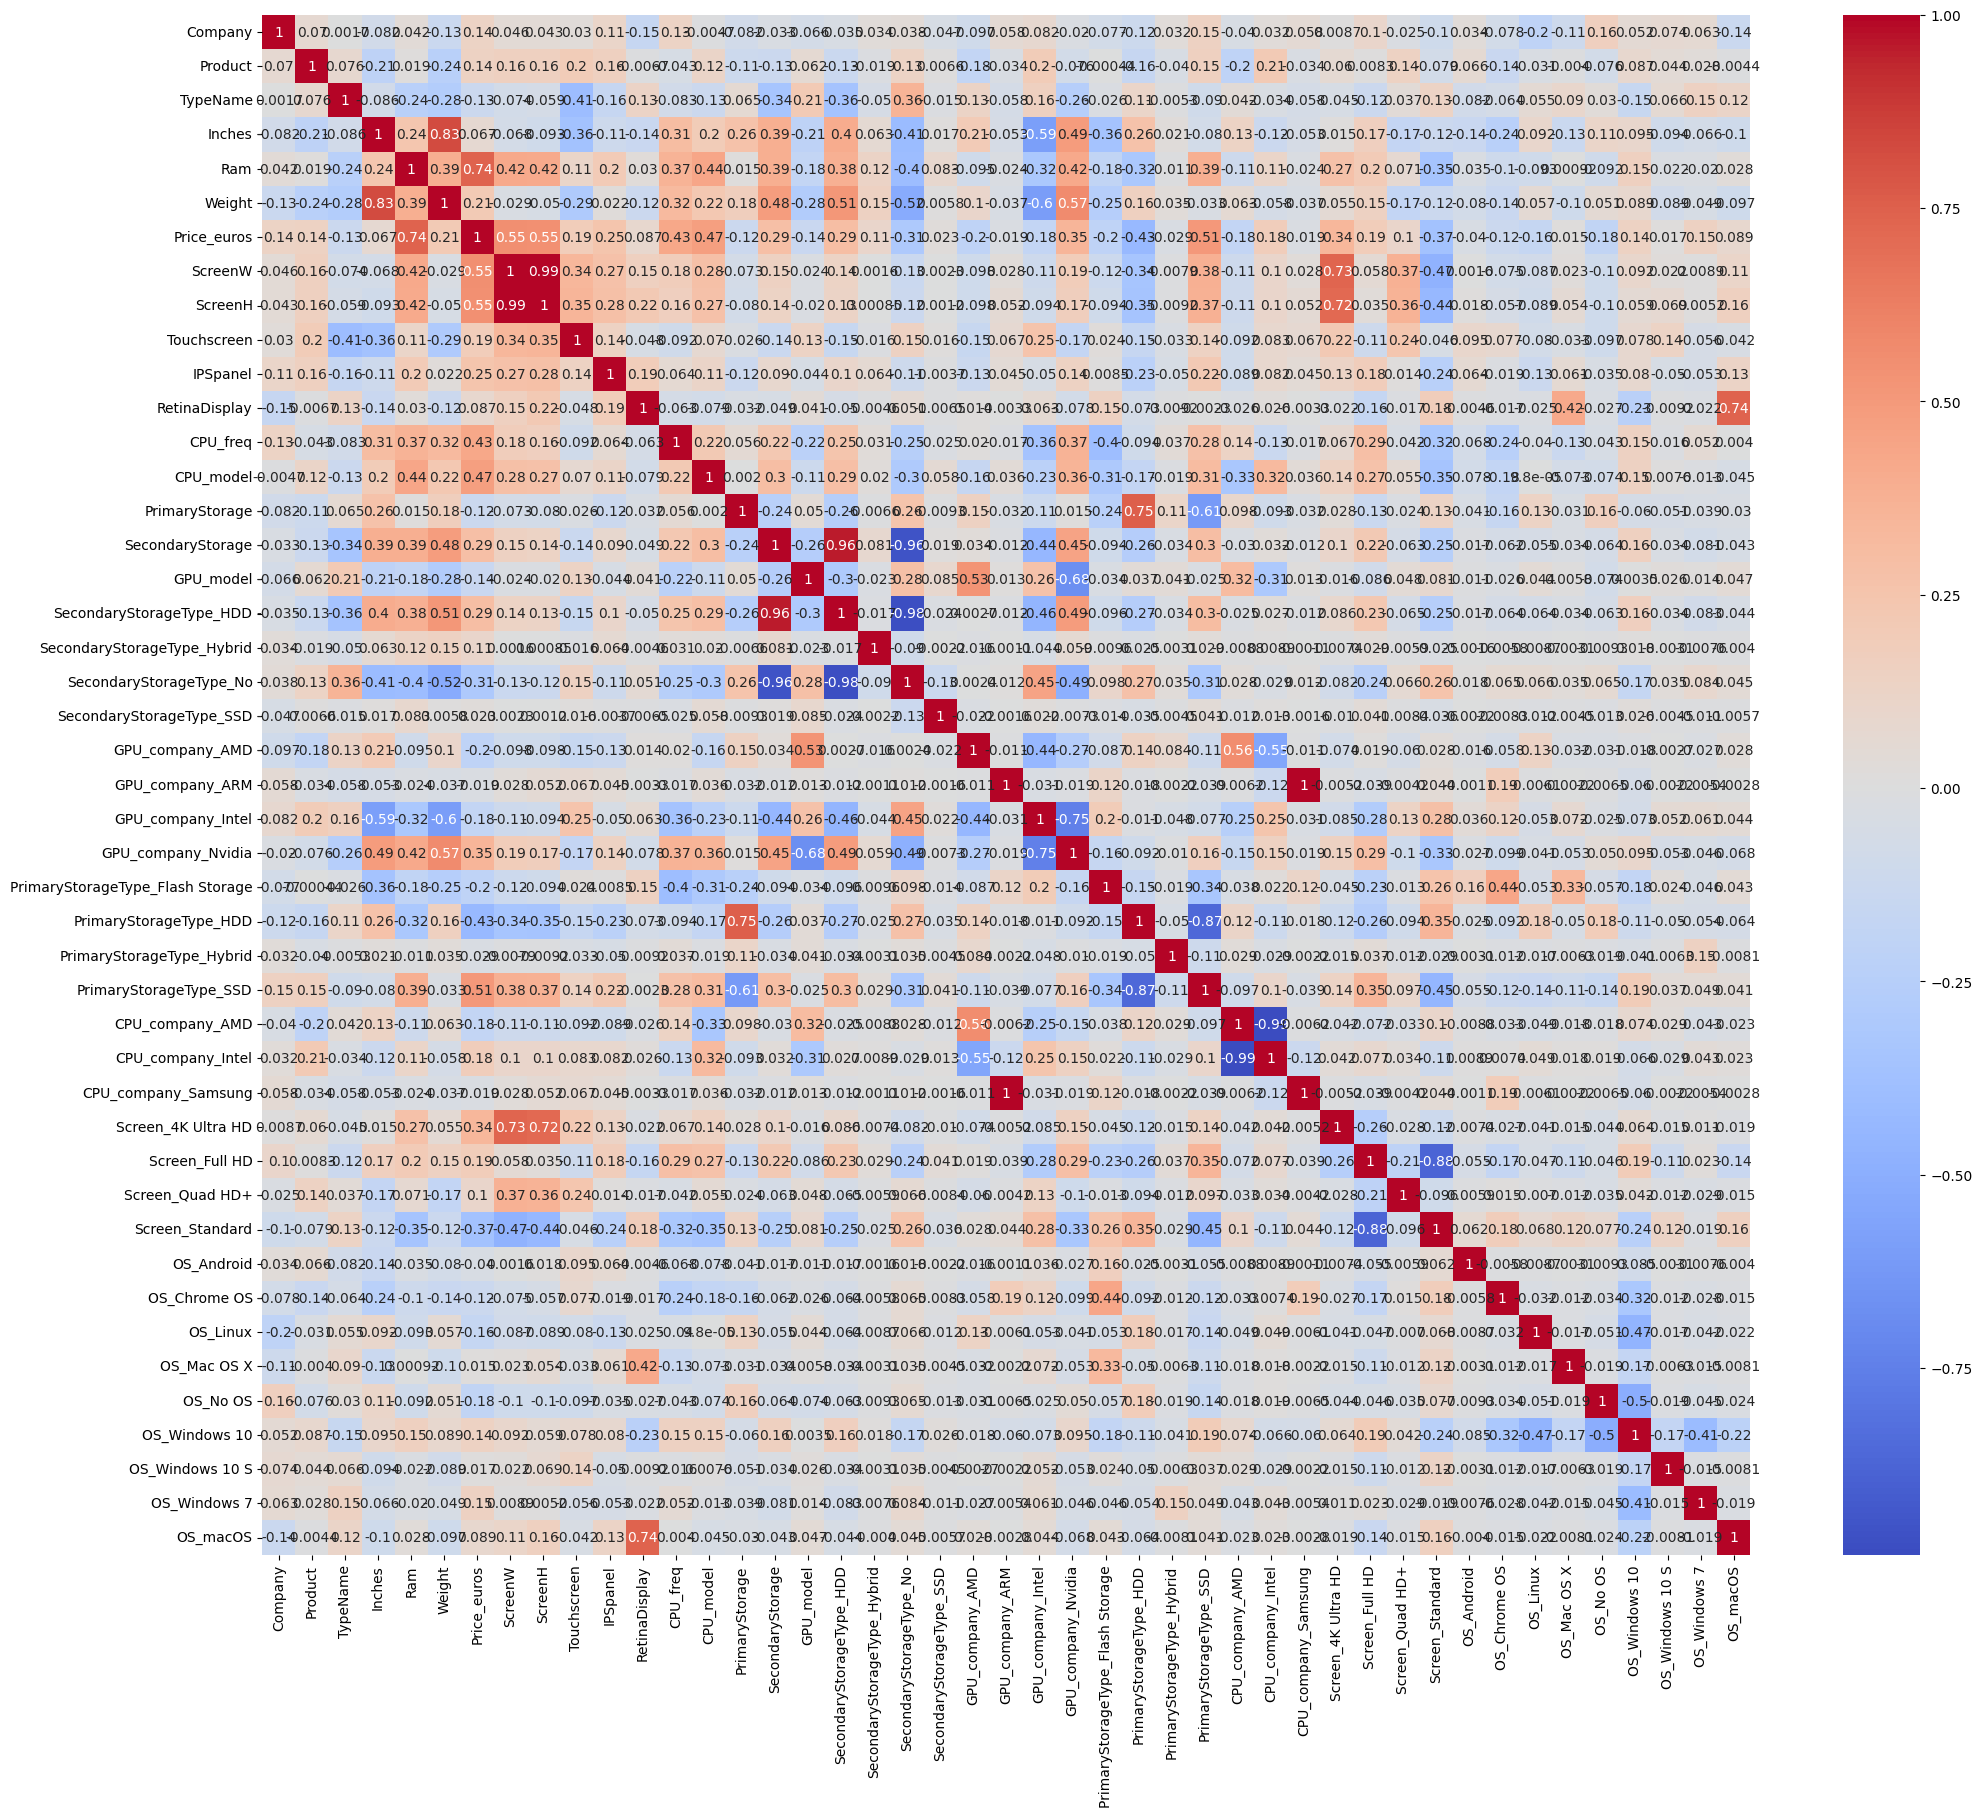

In [11]:
correlation_matrix=df.corr()
plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm")
plt.show()

In [12]:
scaler=MinMaxScaler()
normalized_data=scaler.fit_transform(df)
scalerr=StandardScaler()
standardized_data=scalerr.fit_transform(df)

In [13]:
lr=LinearRegression()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()

y=df["Price_euros"]
x=df.drop("Price_euros",axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=6,train_size=0.7)

In [14]:
mode=lr.fit(x,y)
mode.score(x,y)

0.7543680897358422

In [15]:
model=lr.fit(x_train,y_train)
model.score(x_test,y_test)

0.7499991283797542

In [16]:
modell=dt.fit(x_train,y_train)
modell.score(x_test,y_test)

0.7114635945275744

In [17]:
modelll=rf.fit(x_train,y_train)
modelll.score(x_test,y_test)

0.8195932823816446

In [18]:
df.to_csv('trained_df.csv', index=False)